In [2]:
import pandas as pd

In [3]:
# Caminho do arquivo
url = "candidato.csv"

# Lê e carrega o arquivo para a memória
df = pd.read_csv(url)

In [4]:
df.head()

,id,nomeCompleto,idade,telefone,endereco,estado,genero,habilidadeTecnica,idioma,tipoDeficiencia
0,1,Tine Beston,73,23704-6701,0251 Nova Center,Brasília,Mulher,CSS,Arabic,Nenhum
1,2,Fredi Adamovsky,38,97314-1756,30638 Spenser Junction,Rio de Janeiro,Mulher,C++,Russian,Nenhum
2,3,Ollie De La Haye,78,88515-0085,2327 Straubel Park,São Paulo,Mulher,Python,Portuguese,Intelectual
3,4,Sven Smallthwaite,42,97865-4764,789 1st Circle,Rio de Janeiro,Mulher,Python,Portuguese,Nenhum
4,5,Turner Mecchi,22,65980-7846,26 Schlimgen Parkway,Fortaleza,Mulher,Swift,Portuguese,Fisico


In [6]:
# Define o nome das colunas
header = ['nomeCompleto','idade',	'telefone',	'endereco',	'estado',	'genero',	'habilidadeTecnica',	'idioma',	'tipoDeficiencia']
# Lê e carrega o arquivo para a memória
df = pd.read_csv(url, header=None, names=header)

In [7]:
# Mostra informações sobre o dataframe em si
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1001 entries, id to 1000
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   nomeCompleto       1001 non-null   object
 1   idade              1001 non-null   object
 2   telefone           1001 non-null   object
 3   endereco           1001 non-null   object
 4   estado             1001 non-null   object
 5   genero             1001 non-null   object
 6   habilidadeTecnica  1001 non-null   object
 7   idioma             1001 non-null   object
 8   tipoDeficiencia    1001 non-null   object
dtypes: object(9)
memory usage: 78.2+ KB


In [8]:
df.describe()

,nomeCompleto,idade,telefone,endereco,estado,genero,habilidadeTecnica,idioma,tipoDeficiencia
count,1001,1001,1001,1001,1001,1001,1001,1001,1001
unique,1001,64,1001,1001,6,5,11,11,6
top,nomeCompleto,39,telefone,endereco,São Paulo,Homem,JavaScript,Portuguese,Nenhum
freq,1,24,1,1,211,260,117,467,465


In [11]:
# retorna a quantiade de classes da coluna

#df.tipoDeficiencia.unique()
df.idade.unique()
#df.genero.unique()


array(['idade', '73', '38', '78', '42', '22', '58', '70', '40', '19',
       '77', '41', '47', '27', '64', '33', '67', '57', '45', '63', '21',
       '50', '62', '25', '66', '30', '59', '68', '46', '76', '39', '69',
       '61', '75', '35', '28', '79', '23', '72', '31', '26', '52', '20',
       '54', '56', '34', '48', '55', '29', '36', '74', '71', '65', '24',
       '60', '32', '51', '80', '53', '43', '37', '49', '44', '18'],
      dtype=object)

In [12]:
# agrupamento por média

df.groupby('tipoDeficiencia').mean()
df.groupby('idade').mean()
df.groupby('estado').mean()
df.groupby('genero').mean()

<ipython-input-12-4f4e3bddbba7>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('tipoDeficiencia').mean()


""
tipoDeficiencia
Auditiva
Fisico
Intelectual
Nenhum
Visual
tipoDeficiencia


In [16]:
#  Quantidade de cada categoria

df.groupby('tipoDeficiencia').size()
df.groupby('idade').size()
df.groupby('estado').size()
df.groupby('genero').size()

genero
Homem                    260
Mulher                   258
Não binario              234
Prefiro não responder    248
genero                     1
dtype: int64

In [20]:
import numpy as np

# cópia de df
df_candidato = df

# Gera dados faltante no dataset
for col in df_candidato.columns[:-1]:
    df_candidato.loc[np.random.choice(df_candidato.index, 5), col] = np.nan


In [21]:
df_candidato.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1001 entries, id to 1000
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   nomeCompleto       991 non-null    object
 1   idade              991 non-null    object
 2   telefone           991 non-null    object
 3   endereco           991 non-null    object
 4   estado             991 non-null    object
 5   genero             991 non-null    object
 6   habilidadeTecnica  991 non-null    object
 7   idioma             991 non-null    object
 8   tipoDeficiencia    1001 non-null   object
dtypes: object(9)
memory usage: 110.5+ KB


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

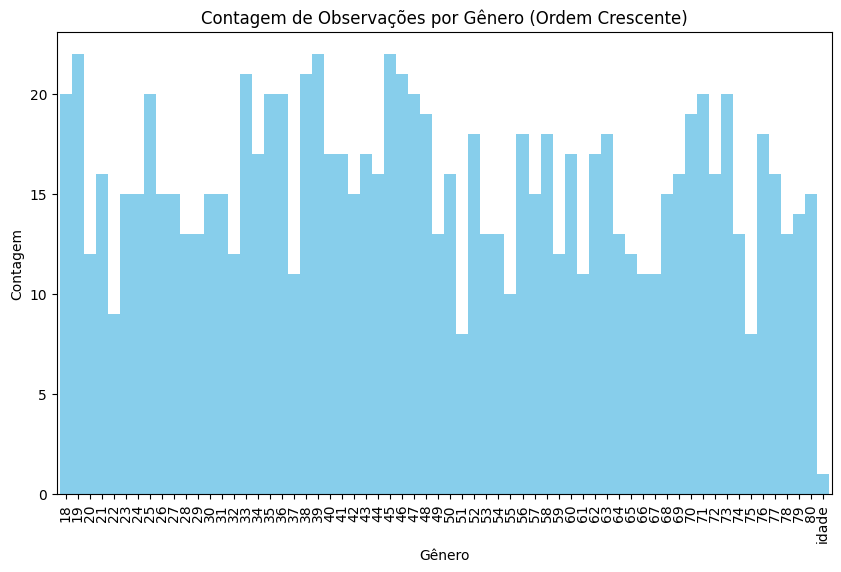

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Suponha que 'df_candidato' seja o DataFrame que contém seus dados
# Certifique-se de que ele possui a coluna 'idade'

# Contagem de observações em cada categoria
count = df_candidato['idade'].value_counts()

# Ordene as contagens em ordem crescente
count = count.sort_index()

# Crie um gráfico de barras com largura personalizada
plt.figure(figsize=(10, 6))
count.plot(kind='bar', color='skyblue', width=1)  # Ajuste a largura aqui (1 neste exemplo)

# Configure os rótulos e título
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.title('Contagem de Observações por Gênero (Ordem Crescente)')

# Exiba o gráfico
plt.show()


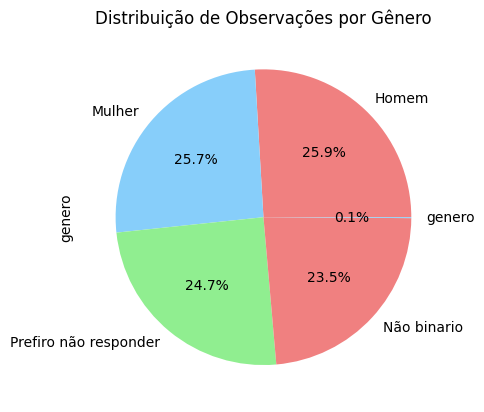

In [29]:
# Contagem de observações em cada categoria
count = df_candidato['genero'].value_counts()

# Crie um gráfico de setores (gráfico de pizza)
count.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue', 'lightgreen'])

# Configure o título
plt.title('Distribuição de Observações por Gênero')

# Exiba o gráfico
plt.show()


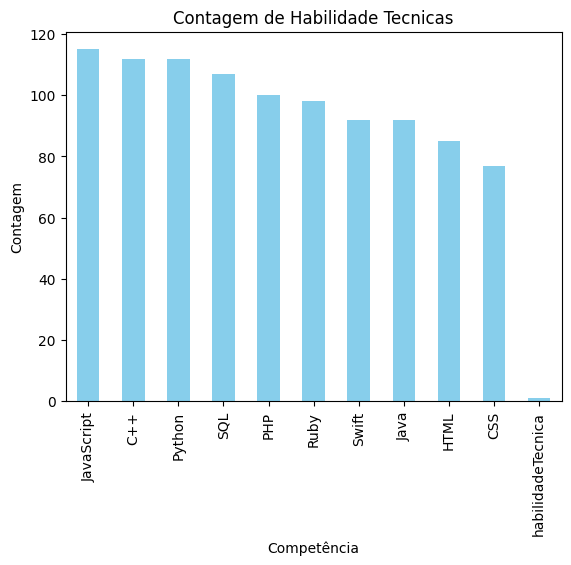

In [31]:
import matplotlib.pyplot as plt

# Contagem de valores únicos em 'competencia'
count = df['habilidadeTecnica'].value_counts()

# Crie um gráfico de barras
count.plot(kind='bar', color='skyblue')

plt.title('Contagem de Habilidade Tecnicas')
plt.xlabel('Competência')
plt.ylabel('Contagem')

plt.show()


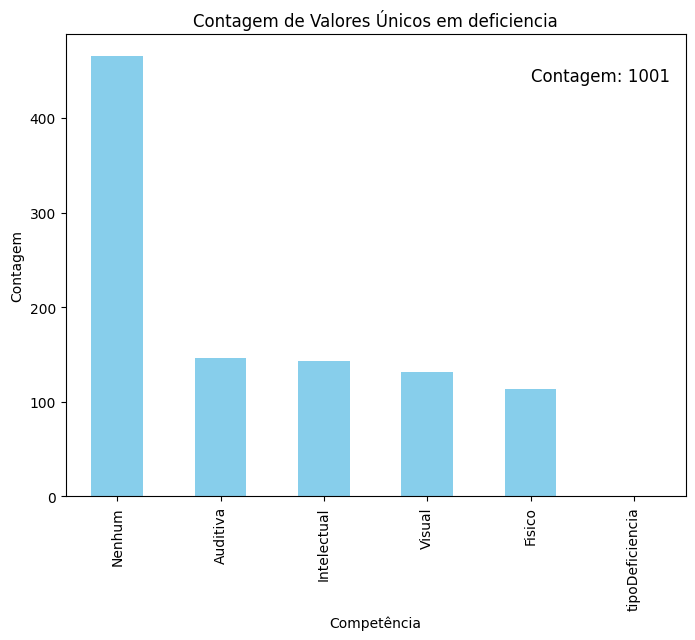

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# Suponha que 'df' seja o seu DataFrame

# Crie um gráfico de barras para a contagem de valores únicos em 'deficiencia'
count = df['tipoDeficiencia'].value_counts()
plt.figure(figsize=(8, 6))
count.plot(kind='bar', color='skyblue')

# Adicione a contagem como texto no gráfico
plt.text(0.75, 0.9, f'Contagem: {count.sum()}', transform=plt.gca().transAxes, fontsize=12, color='black')

plt.title('Contagem de Valores Únicos em deficiencia')
plt.xlabel('Competência')
plt.ylabel('Contagem')
plt.show()


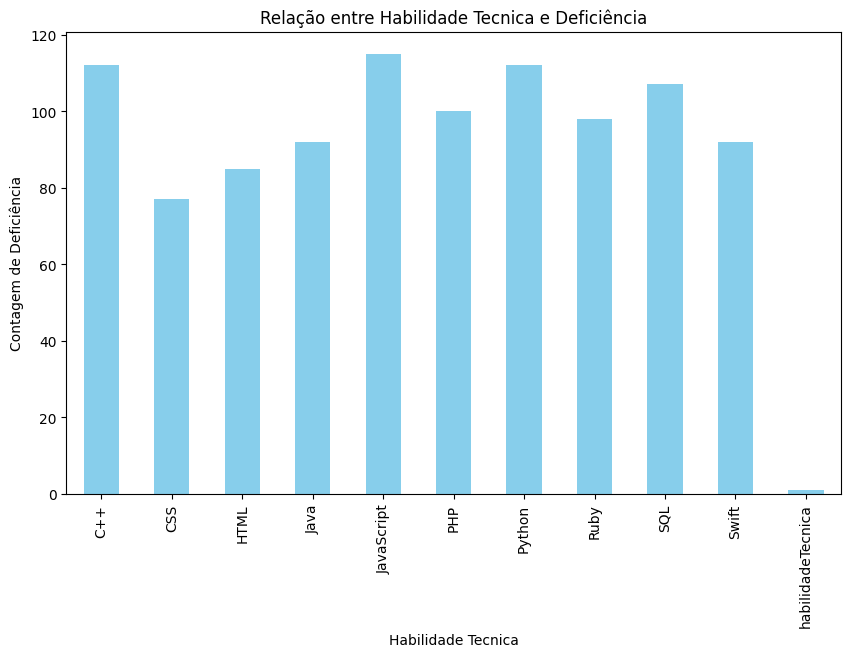

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

# Suponha que 'df_competencia' seja o seu DataFrame

# Calcule a contagem de valores na coluna 'deficiencia' para cada valor na coluna 'competencia'
count_relationship = df_candidato.groupby('habilidadeTecnica')['tipoDeficiencia'].count()

# Crie um gráfico de barras para mostrar a relação entre 'competencia' e 'deficiencia'
count_relationship.plot(kind='bar', color='skyblue', figsize=(10, 6))

plt.title('Relação entre Habilidade Tecnica e Deficiência')
plt.xlabel('Habilidade Tecnica')
plt.ylabel('Contagem de Deficiência')
plt.show()


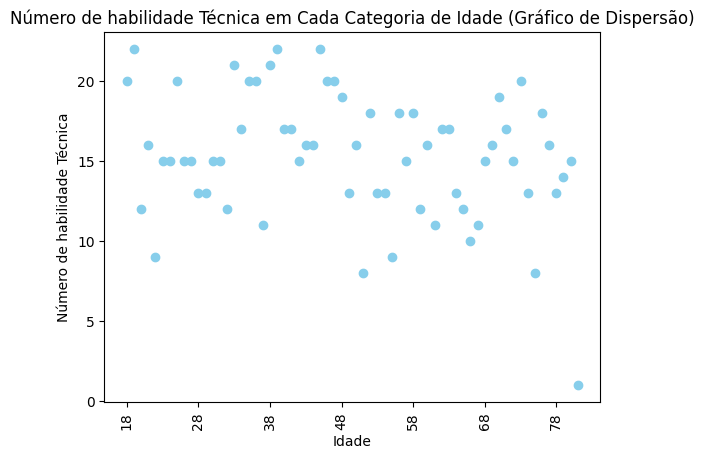

In [39]:
import matplotlib.pyplot as plt
import pandas as pd

# Suponha que 'df_competencia' seja o seu DataFrame

# Calcule a contagem de habilidades técnicas em cada categoria de idade
count_relationship = df_candidato.groupby('idade')['habilidadeTecnica'].count().reset_index()

# Crie um gráfico de dispersão
plt.scatter(range(len(count_relationship)), count_relationship['habilidadeTecnica'], c='skyblue', marker='o')

plt.title('Número de habilidade Técnica em Cada Categoria de Idade (Gráfico de Dispersão)')
plt.xlabel('Idade')
plt.ylabel('Número de habilidade Técnica')

# Defina os rótulos do eixo X a cada 10 categorias
step = 10
plt.xticks(range(0, len(count_relationship), step), count_relationship['idade'][::step], rotation=90)

plt.show()


